In [54]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [55]:
path1 = "record/log.json"
path2 = "record/log-lr.json"
log = json.load(open(path1))
log_lr = json.load(open(path2))
print(log.keys())

dict_keys(['recentIterNum', 'recentLoss', 'recentEvalLoss', 'iters', 'dataset_config'])


In [56]:
def get_loss(log):
    loss = []
    iters = []
    for iter in log['iters'].keys():
         loss.append(float(log['iters'][iter]['loss']))
         iters.append(int(iter))
    return np.array(iters), np.array(loss)

def get_evalLoss(log):
    evalLoss = []
    iters = []
    for iter in log['iters'].keys():
        if 'evalLoss' in log['iters'][iter].keys():
            evalLoss.append(float(log['iters'][iter]['evalLoss']))
            iters.append(int(iter))
    return np.array(iters), np.array(evalLoss)

iters, loss = get_loss(log)
iters_lr, loss_lr = get_loss(log_lr)
iters_eval, evalLoss = get_evalLoss(log)
iters_eval_lr, evalLoss_lr = get_evalLoss(log_lr)

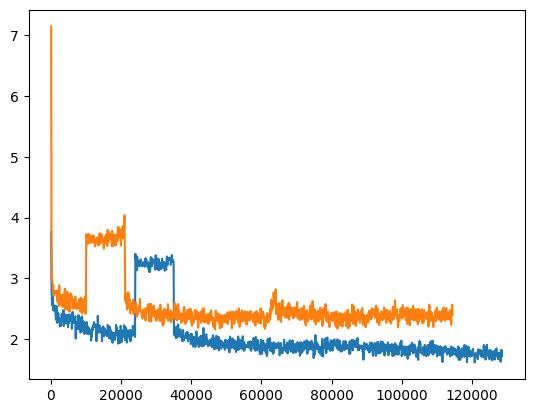

In [57]:
plt.plot(iters, loss, label='loss')
plt.plot(iters_lr, loss_lr, label='loss-lr')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(20000))
plt.show()


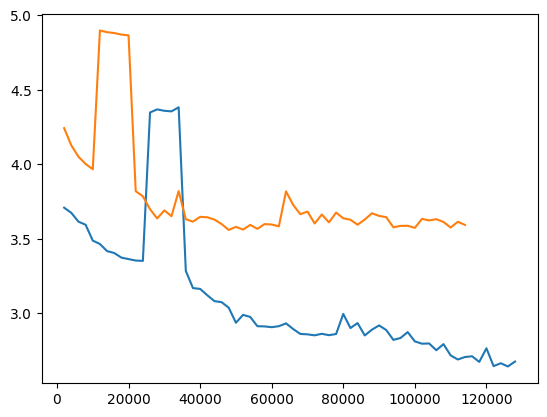

In [58]:
plt.plot(iters_eval, evalLoss, label='evalLoss')
plt.plot(iters_eval_lr, evalLoss_lr, label='evalLoss-lr')
plt.show()